In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    '/Users/Beba/Documents/JupyterNotebooks/LoanStats3d.csv',
    skipinitialspace=True,
    header=1
)

# Note the warning about dtypes.

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [6]:
y2015 = y2015[:-2]

In [7]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([ 0.98589509,  0.98549107,  0.98610781,  0.98617905,  0.98577535,
        0.98525256,  0.9853947 ,  0.9838748 ,  0.98373231,  0.98351818])

In [8]:
print(y2015.columns.values)

['id' 'member_id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'term'
 'int_rate' 'installment' 'grade' 'emp_length' 'home_ownership'
 'annual_inc' 'verification_status' 'issue_d' 'loan_status' 'pymnt_plan'
 'purpose' 'title' 'dti' 'delinq_2yrs' 'inq_last_6mths'
 'mths_since_last_delinq' 'mths_since_last_record' 'open_acc' 'pub_rec'
 'revol_bal' 'total_acc' 'initial_list_status' 'out_prncp' 'out_prncp_inv'
 'total_pymnt' 'total_pymnt_inv' 'total_rec_prncp' 'total_rec_int'
 'total_rec_late_fee' 'recoveries' 'collection_recovery_fee' 'last_pymnt_d'
 'last_pymnt_amnt' 'next_pymnt_d' 'last_credit_pull_d'
 'collections_12_mths_ex_med' 'mths_since_last_major_derog' 'policy_code'
 'application_type' 'annual_inc_joint' 'dti_joint'
 'verification_status_joint' 'acc_now_delinq' 'tot_coll_amt' 'tot_cur_bal'
 'open_acc_6m' 'open_act_il' 'open_il_12m' 'open_il_24m'
 'mths_since_rcnt_il' 'total_bal_il' 'il_util' 'open_rv_12m' 'open_rv_24m'
 'max_bal_bc' 'all_util' 'total_rev_hi_lim' 'inq_fi' 'total_c

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import seaborn as sns

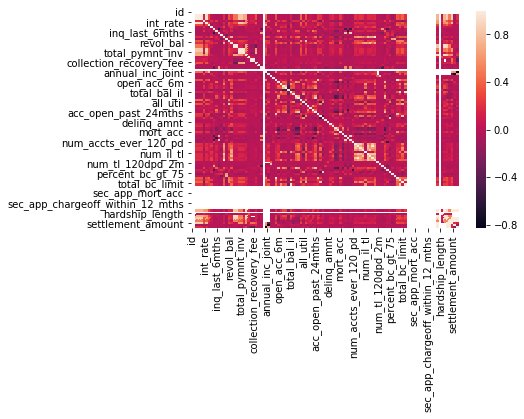

In [10]:
sns.heatmap(y2015.corr())

In [11]:
y2015_pca = y2015.filter(['loan_amnt',
                          'funded_amnt',
                          'funded_amnt_inv',
                          'term',
                          'int_rate',
                          'installment',
                          'grade',
                          'emp_length',
                          'home_ownership',
                          'annual_inc',
                          'verification_status',
                          'issue_d',
                          'pymnt_plan',
                          'purpose',
                          'title',
                          'dti',
                          'delinq_2yrs',
                          'inq_last_6mths',
                          'mths_since_last_delinq',
                          'mths_since_last_record',
                          'open_acc',
                          'pub_rec',
                          'revol_bal',
                          'total_acc',
                          'initial_list_status',
                          'out_prncp',
                          'out_prncp_inv',
                          'total_pymnt',
                          'total_pymnt_inv',
                          'total_rec_prncp',
                          'total_rec_int',
                          'total_rec_late_fee',
                          'recoveries',
                          'collection_recovery_fee',
                          'last_pymnt_d',
                          'last_pymnt_amnt',
                          'next_pymnt_d',
                          'last_credit_pull_d',
                          'collections_12_mths_ex_med',
                          'mths_since_last_major_derog',
                          'policy_code',
                          'application_type',
                          'annual_inc_joint',
                          'dti_joint',
                          'verification_status_joint',
                          'acc_now_delinq',
                          'tot_coll_amt',
                          'tot_cur_bal',
                          'open_acc_6m',
                          'open_act_il'])

In [12]:
X_dummies = pd.get_dummies(y2015_pca)
X_clean = X_dummies.dropna(axis=1)

cross_val_score(rfc, X_clean, Y, cv=10)

array([ 0.98513523,  0.98546733,  0.98553788,  0.98598908,  0.98508668,
        0.98439763,  0.984611  ,  0.98439726,  0.98385105,  0.98437314])

In [13]:
y2015_pca2 = y2015.filter(['loan_amnt',
                          'term',
                          'int_rate',
                          'installment',
                          'grade',
                          'emp_length',
                          'home_ownership',
                          'verification_status',
                          'pymnt_plan',
                          'purpose',
                          'title',
                          'dti',
                          'delinq_2yrs',
                          'inq_last_6mths',
                          'recoveries',
                          'collection_recovery_fee',
                          'last_credit_pull_d',
                          'collections_12_mths_ex_med',
                          'mths_since_last_major_derog',
                          'open_acc_6m',
                          'open_act_il'])

In [14]:
X_dummies2 = pd.get_dummies(y2015_pca2)
X_clean2 = X_dummies2.dropna(axis=1)

cross_val_score(rfc, X_clean2, Y, cv=10)

array([ 0.70811863,  0.70557086,  0.70341962,  0.70890525,  0.7115412 ,
        0.70744971,  0.69689845,  0.70402299,  0.70376176,  0.69226019])

In [15]:
y2015_pca3 = y2015.filter(['loan_amnt',
                          'funded_amnt',
                          'term',
                          'int_rate',
                          'out_prncp',
                          'total_pymnt',
                          'total_rec_prncp',
                          'total_rec_late_fee',
                          'recoveries',
                          'collection_recovery_fee',
                          'last_pymnt_d',
                          'last_pymnt_amnt'])

X_dummies3 = pd.get_dummies(y2015_pca3)
X_clean3 = X_dummies3.dropna(axis=1)

cross_val_score(rfc, X_clean3, Y, cv=10)

array([ 0.97651557,  0.98399506,  0.98368559,  0.98446925,  0.98394681,
        0.98311525,  0.98211741,  0.98323359,  0.98363731,  0.98468188])

In [16]:
y2015_pca4 = y2015.filter(['loan_amnt',
                          'term',
                          'int_rate',
                          'total_rec_prncp',
                          'total_rec_late_fee',
                          'recoveries',
                          'collection_recovery_fee',])

X_dummies4 = pd.get_dummies(y2015_pca4)
X_clean4 = X_dummies4.dropna(axis=1)

cross_val_score(rfc, X_clean4, Y, cv=10)

array([ 0.84641322,  0.94044453,  0.92341487,  0.94312515,  0.93706958,
        0.93588069,  0.91680916,  0.92471739,  0.93564168,  0.92454936])

## Random Forest model

The Random Forest model ran very very slow. A little trial and error with the columns used and I was able to wittle down the total features to 7 while still maintaining an average cross validation score above 90%. The last iteration specifically left out any columns refering to payment amounts or outstanding principle balance.

# Challenge: if a tree falls in the forest...

In [24]:
from sklearn import tree
import time
from datetime import timedelta

start_time = time.monotonic()

decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            max_features=1,
                                            max_depth=6)
decision_tree.fit(X_clean4, Y)

end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

0:00:01.204066


In [26]:
start_time = time.monotonic()

cross_val_score(rfc, X_clean4, Y, cv=10)

end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

0:01:32.407194


# Lasso and Ridge Regression Practice

In [28]:
from sklearn import linear_model
from sklearn import preprocessing

# Load air quality data, drop the index column and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:, 1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default'] == 'Yes', 1, 0)
df['student'] = np.where(df['student'] == 'Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

# Set up the regression model to predict defaults using all other
# variables as features.
regr1 = linear_model.LinearRegression()
Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]
regr1.fit(X_train, Y_train)
print('\nR-squared simple model:')
print(regr1.score(X_train, Y_train))

#Store the parameter estimates.
origparams = np.append(regr1.coef_, regr1.intercept_)

# Make new features to capture potential quadratic and cubic relationships
# between the features.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

# Re-run the model with the new features.
regrBig = linear_model.LinearRegression()
X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]
regrBig.fit(X_train2, Y_train)
print('\nR-squared complex model:')
print(regrBig.score(X_train2, Y_train))

# Store the new parameter estimates for the same features.
newparams = np.append(
    regrBig.coef_[0,0:(len(origparams)-1)],
    regrBig.intercept_)

print('\nParameter Estimates for the same predictors for the small model '
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)


R-squared simple model:
0.573878496272

R-squared complex model:
0.573973445206

Parameter Estimates for the same predictors for the small model and large model:
[[0.014 -0.004]
 [-0.759 -0.759]
 [0.000 4157.867]
 [-0.001 553434.569]]


In [29]:
# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]
print('\nR-squared simple model:')
print(regr1.score(X_test, Y_test))

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3

# Re-run the model with the new features.
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]
print('\nR-squared complex model:')
print(regrBig.score(X_test2, Y_test))


R-squared simple model:
0.56306979225

R-squared complex model:
0.563023952736


In [31]:
# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. Note that by convention, the
# intercept is not regularized. Since we standardized the data
# earlier, the intercept should be equal to zero and can be dropped.

ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
print(ridgeregrBig.score(X_train2, Y_train))
newparams = ridgeregrBig.coef_[0, 0:len(origparams)]

print('\nParameter Estimates for the same predictors for the small model'
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)



0.57387391644
[  1.36988466e-02  -7.57859433e-01  -3.25298557e-04]
0.573946428961

Parameter Estimates for the same predictors for the small modeland large model:
[[0.014 -0.002]
 [-0.758 -0.757]
 [-0.000 0.048]]


In [32]:
print(ridgeregr.score(X_test, Y_test))
print(ridgeregrBig.score(X_test2, Y_test))

0.563108876308
0.563180432393


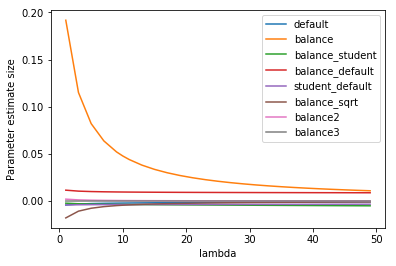

In [33]:
# Store estimates.
estimates = np.append(ridgeregrBig.coef_, [10])

# Storing legend information.
labels = []

#Run the model for many alphas.
for lambd in range(1, 50, 2):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    estimates = np.row_stack((
        estimates,
        np.append(ridgeregrBig.coef_,[lambd])))

# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=list(X_train2.columns) + ['lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:9,])
varstoplot.remove('student')

# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()

In [35]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.443633767129

Parameter estimates for the model with many features:
[  0.00000000e+00  -3.89351238e-01   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -2.77688887e-04
  -7.09158792e-07   3.48711577e+00]


In [36]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.445532251512
0.438046634591


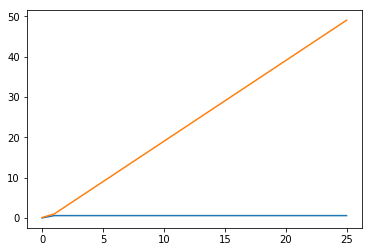

In [178]:
new_scores = np.append([0], [.10])

for lambd in range(1, 50, 2):
    ridgeregr = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregr.fit(X_train2, Y_train)
    new_scores = np.row_stack((
        new_scores,
        np.append(ridgeregr.score(X_train2, Y_train),[lambd])))
    
    
scores_df = pd.DataFrame(new_scores, columns=('score', 'lambda'))
plt.plot(scores_df)
plt.show()

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


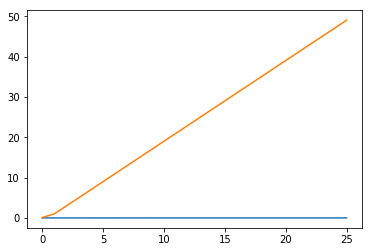

In [179]:
new_scores2 = np.append([0], [.10])

for lambd in range(1, 50, 2):
    lass = linear_model.Lasso(alpha=lambd, fit_intercept=False)
    lass.fit(X_train2, Y_train)
    new_scores2 = np.row_stack((
        new_scores2,
        np.append(lass.score(X_train2, Y_train),[lambd])))
    
    
lass_scores = pd.DataFrame(new_scores2, columns=('score', 'lambda'))
plt.plot(lass_scores)


In [172]:
print(lass_scores)

       score  lambda
0   0.000000     0.1
1   0.004630     1.0
2   0.003162     6.0
3   0.001649    11.0
4   0.000089    16.0
5  -0.000015    21.0
6  -0.000015    26.0
7  -0.000015    31.0
8  -0.000015    36.0
9  -0.000015    41.0
10 -0.000015    46.0
11 -0.000015    51.0
12 -0.000015    56.0
13 -0.000015    61.0
14 -0.000015    66.0
15 -0.000015    71.0
16 -0.000015    76.0
17 -0.000015    81.0
18 -0.000015    86.0
19 -0.000015    91.0
20 -0.000015    96.0
21 -0.000015   101.0
22 -0.000015   106.0
23 -0.000015   111.0
24 -0.000015   116.0
25 -0.000015   121.0


In [177]:
print(scores_df)

       score  lambda
0   0.000000     0.1
1   0.573969     1.0
2   0.573960     3.0
3   0.573955     5.0
4   0.573951     7.0
5   0.573948     9.0
6   0.573945    11.0
7   0.573943    13.0
8   0.573940    15.0
9   0.573938    17.0
10  0.573936    19.0
11  0.573933    21.0
12  0.573931    23.0
13  0.573928    25.0
14  0.573925    27.0
15  0.573922    29.0
16  0.573919    31.0
17  0.573915    33.0
18  0.573912    35.0
19  0.573908    37.0
20  0.573904    39.0
21  0.573900    41.0
22  0.573896    43.0
23  0.573891    45.0
24  0.573886    47.0
25  0.573882    49.0
